#### <div style="text-align: right"> 29.11.2017 </div>
## Exploring Weather Trends
### Soner Nefşioğulları  - Udacity Data Analyst Nanodegree Candidate

First, an SQL query is written to see which cities are listed in the spesific country. 

>SELECT *

>FROM city_list

>WHERE country = 'Turkey' ;

---
Second, query for extracting the city level data. Then exported to CSV.

>SELECT *

>FROM city_data

>WHERE city = 'Istanbul' ;

---
Third, a query for extracting global data. Then exported to CSV.

>SELECT *

>FROM global_data;

In [1]:
%matplotlib inline  
#to be able to see output of plotting commands directly below the code cell that produced it
import pandas as pd #to be able to read and make additional analysis
import matplotlib.pylab as pl #to be able to plot the graphs 

In [2]:
istanbul = pd.read_csv("results_istanbul.csv", sep=',')  #reading full txt file
istanbul.head()     #shows the first 5 row of the dataframe

,year,city,country,avg_temp
0,1743,Istanbul,Turkey,10.37
1,1744,Istanbul,Turkey,15.04
2,1745,Istanbul,Turkey,6.20
3,1746,Istanbul,Turkey,NaN
4,1747,Istanbul,Turkey,NaN


In [3]:
global_ = pd.read_csv("results_global.csv", sep=',')   #reading full txt file
global_.head() 

,year,avg_temp
0,1750,8.72
1,1751,7.98
2,1752,5.78
3,1753,8.39
4,1754,8.47


Let's check whether if we have "null" values in dataframe

In [4]:
global_.isnull().values.any() 

False

In [5]:
istanbul.isnull().sum().sum()

4

There are 4 "NaN" values in istanbul dataframe. 

In [6]:
nan_rows = istanbul[istanbul.isnull().any(1)]
nan_rows

,year,city,country,avg_temp
3,1746,Istanbul,Turkey,NaN
4,1747,Istanbul,Turkey,NaN
5,1748,Istanbul,Turkey,NaN
6,1749,Istanbul,Turkey,NaN


Since dataframes start from different years, it is better to set beginning year equal for upcoming comparison. 

In [7]:
istanbul = istanbul[istanbul['year']>1749]

In [8]:
istanbul.head()

,year,city,country,avg_temp
7,1750,Istanbul,Turkey,13.83
8,1751,Istanbul,Turkey,14.14
9,1752,Istanbul,Turkey,9.48
10,1753,Istanbul,Turkey,13.42
11,1754,Istanbul,Turkey,13.58


What about ending years?

In [9]:
global_.tail()

,year,avg_temp
261,2011,9.52
262,2012,9.51
263,2013,9.61
264,2014,9.57
265,2015,9.83


In [10]:
istanbul.tail()

,year,city,country,avg_temp
266,2009,Istanbul,Turkey,14.95
267,2010,Istanbul,Turkey,15.60
268,2011,Istanbul,Turkey,13.65
269,2012,Istanbul,Turkey,14.97
270,2013,Istanbul,Turkey,16.02


Make ending years equal:

In [12]:
global_=global_[global_['year']<2014]

In [13]:
global_.tail()

,year,avg_temp
259,2009,9.51
260,2010,9.70
261,2011,9.52
262,2012,9.51
263,2013,9.61


Calculate moving average taking last 5 years' average of the average temperatures. Iterate it for each year. 

In [14]:
istanbul['mov_avg_ist'] = istanbul.avg_temp.rolling(window=5).mean()
istanbul.head()

,year,city,country,avg_temp,mov_avg_ist
7,1750,Istanbul,Turkey,13.83,NaN
8,1751,Istanbul,Turkey,14.14,NaN
9,1752,Istanbul,Turkey,9.48,NaN
10,1753,Istanbul,Turkey,13.42,NaN
11,1754,Istanbul,Turkey,13.58,12.89


In [17]:
global_['mov_avg_glob'] = global_.avg_temp.rolling(window=5).mean()

In [18]:
global_.head()

,year,avg_temp,mov_avg_glob
0,1750,8.72,NaN
1,1751,7.98,NaN
2,1752,5.78,NaN
3,1753,8.39,NaN
4,1754,8.47,7.868


In [24]:
del global_['avg_temp']

In [25]:
compare = pd.merge(istanbul, global_, how='left', on='year')

In [27]:
compare.head()

,year,city,country,avg_temp,mov_avg_ist,mov_avg_glob
0,1750,Istanbul,Turkey,13.83,NaN,NaN
1,1751,Istanbul,Turkey,14.14,NaN,NaN
2,1752,Istanbul,Turkey,9.48,NaN,NaN
3,1753,Istanbul,Turkey,13.42,NaN,NaN
4,1754,Istanbul,Turkey,13.58,12.89,7.868


In [32]:
compare = compare.drop(compare.index[:4])

In [34]:
compare.head()

,year,city,country,avg_temp,mov_avg_ist,mov_avg_glob
4,1754,Istanbul,Turkey,13.58,12.890,7.868
5,1755,Istanbul,Turkey,13.36,12.796,7.796
6,1756,Istanbul,Turkey,14.10,12.788,7.970
7,1757,Istanbul,Turkey,13.90,13.672,8.618
8,1758,Istanbul,Turkey,12.10,13.408,8.288


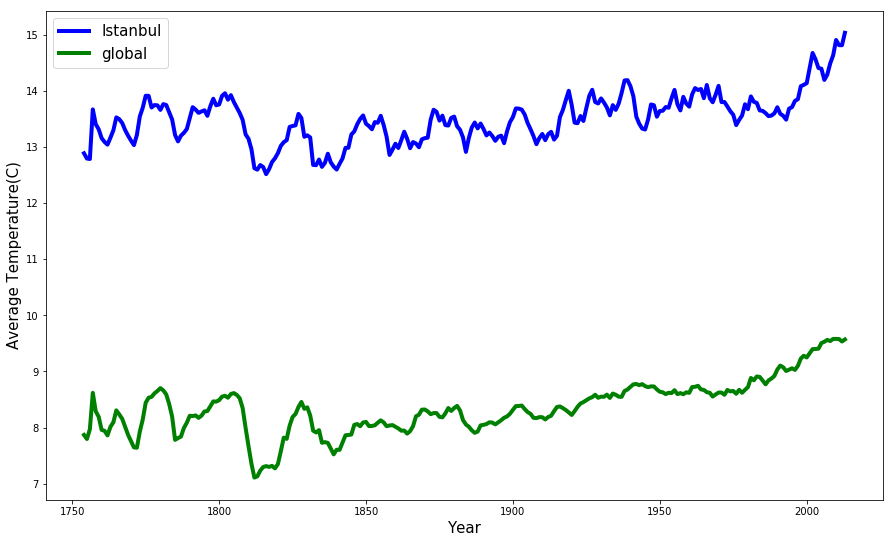

In [71]:
pl.figure(figsize=(15,9))   #setting figure size
pl.plot( 'year', 'mov_avg_ist', data=compare, color='blue', linewidth=4, label='Istanbul')
pl.plot( 'year', 'mov_avg_glob', data=compare, color='green', linewidth=4, label='global')
pl.xlabel("Year", fontsize=15)
pl.ylabel("Average Temperature(C)", fontsize=15)
pl.legend(loc='upper left', fontsize=15)

### Takeaways

* Istanbul is hot city compared to global average temperature.
* Average temperature of Istanbul is always greater than average global for all years between 1750 and 2013. In addition, the difference seems to stayed constant over time, although there is slight convergence in 1980s.
* Average temperatures fluctuating yearly for both istanbul and global. The fluctiations looks like same  between 1750 and 1850. After this time, istanbul temperature has ups and downs while global average is more upward-flat compared to istanbul. 
* The overall average is constant until 1900. However, after 1900 both istanbul and global average temperatures are begining to incerease.
* There is a dramatic increase for both istanbul and global average temperature after 2000. 